In [92]:
import numpy as np
import matplotlib.pyplot as plt


import mne

import glob
import os
import pickle
import sys
sys.path.append('../utils')
from ERP_utils import *

### Set up 

In [93]:

def find_existing_subjects(task, period, erp_window, freq_high):
    """ 
    automatically find subjects existing in folder
    """
    
    evoked_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_ERP_data{erp_window}_{freq_high}Hz'

    subjects_to_process = []
    for file_name in os.listdir(evoked_dir):
        # Check if the file matches the format you're interested in
        if file_name.startswith(f"{task}_ERP") and file_name.endswith(".fif"):
            # Extract the subject ID (last two characters before ".fif")
            subject_id = file_name.split("_")[-1].split(".")[0]
            subjects_to_process.append(subject_id)

    # Sort the list of subjects (optional)
    subjects_to_process = sorted(subjects_to_process)
    return subjects_to_process

In [94]:
#-----------------------------
#           PARAMETERS
#-----------------------------
task = 'training' #listen or motor
erp_window = '_n05to05'
freq_high = 30

evoked_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_ERP_data{erp_window}_{freq_high}Hz'
epochs_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_epochs_data{erp_window}_{freq_high}Hz'


#period = 'post'
#subjects_to_process = ['17', '19']
subjects_to_process = find_existing_subjects(task = task, period = 'pre',erp_window=erp_window,freq_high=freq_high) #subs that exist in pre should exist in post

print('processing subjects', subjects_to_process)
if task == 'motor': 
    plot_times = [0, 0.2]
else: 
    plot_times = [0, 0.1]


mne.set_log_level('CRITICAL')

processing subjects ['05', '06', '07', '08', '09', '10', '11', '12', '15', '17', '18', '19', '20', '21']


In [95]:
evoked_dir

'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_training/training_ERP_data_n05to05_30Hz'

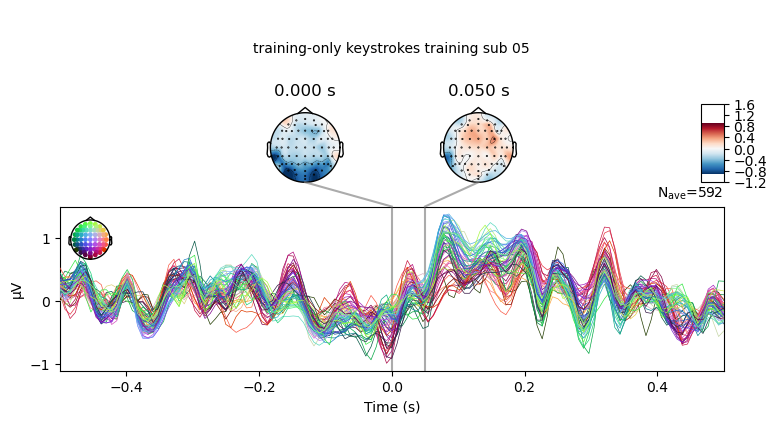

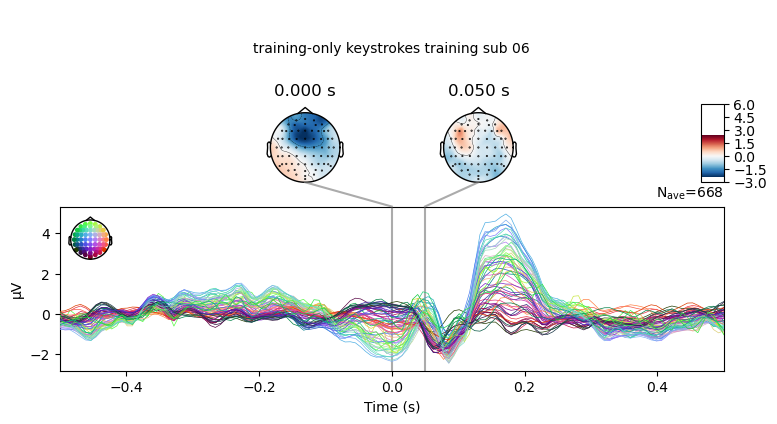

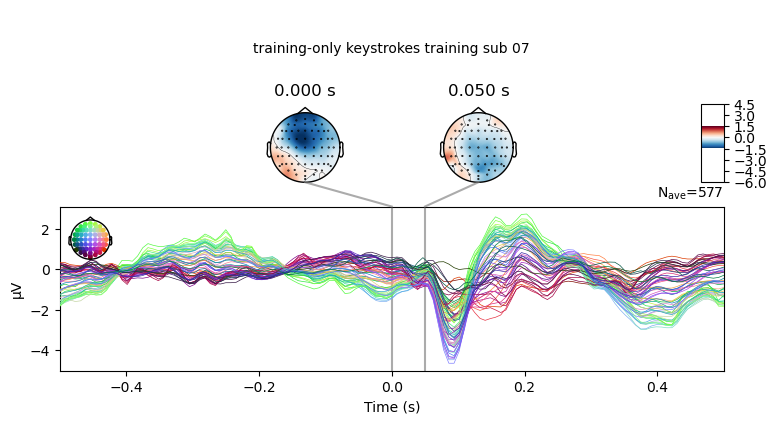

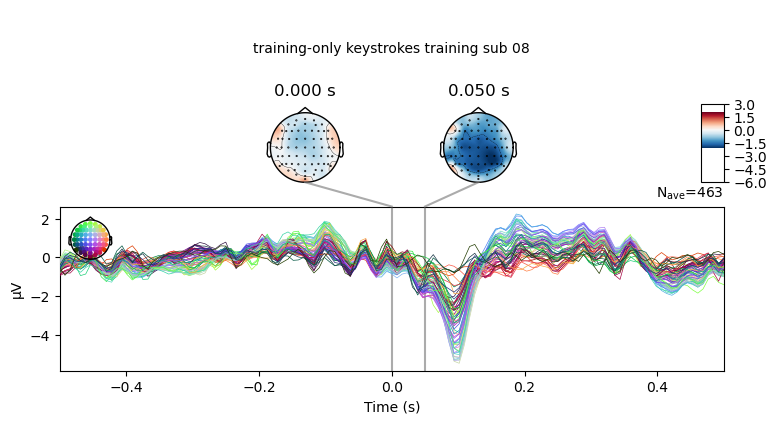

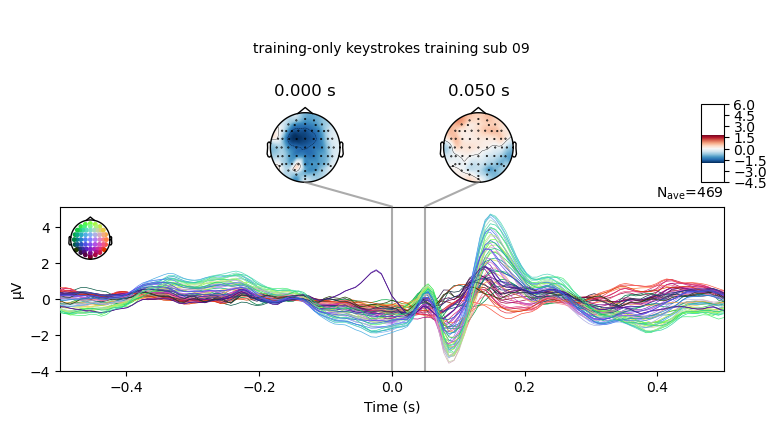

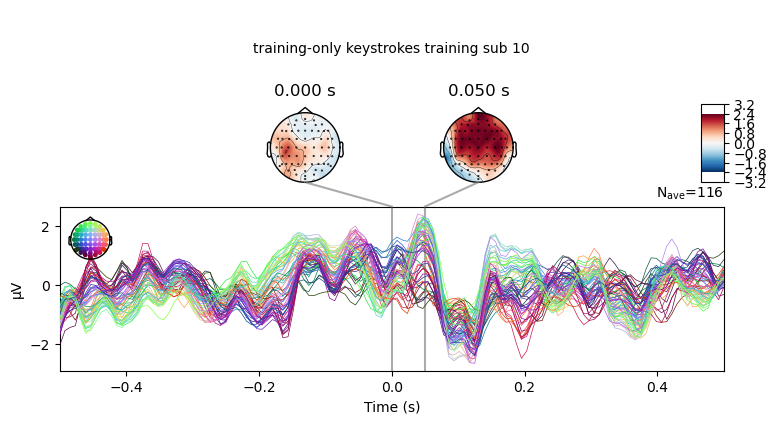

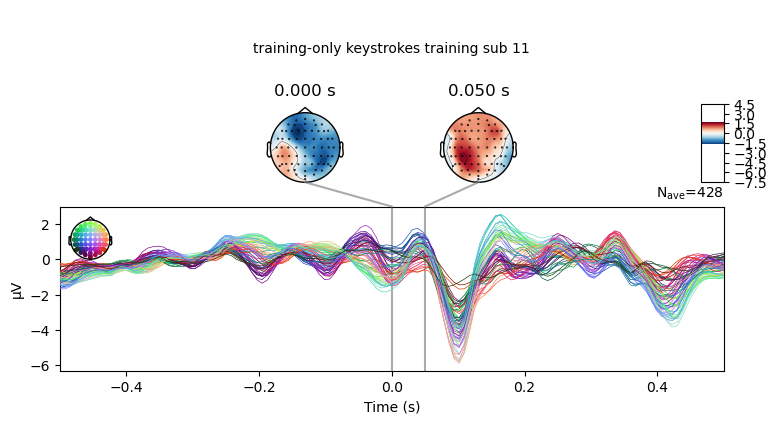

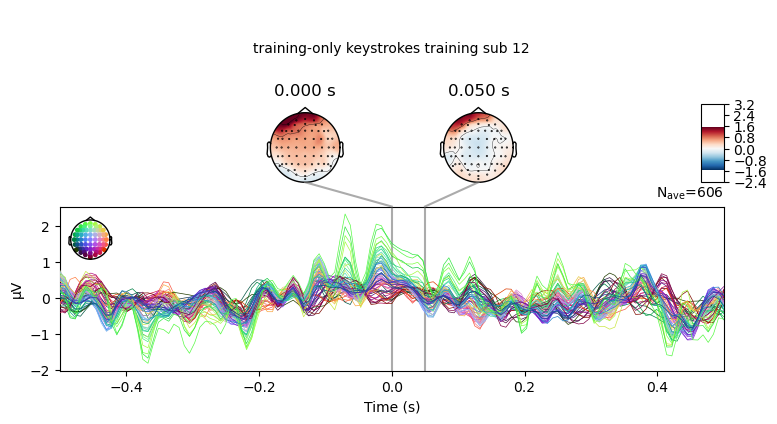

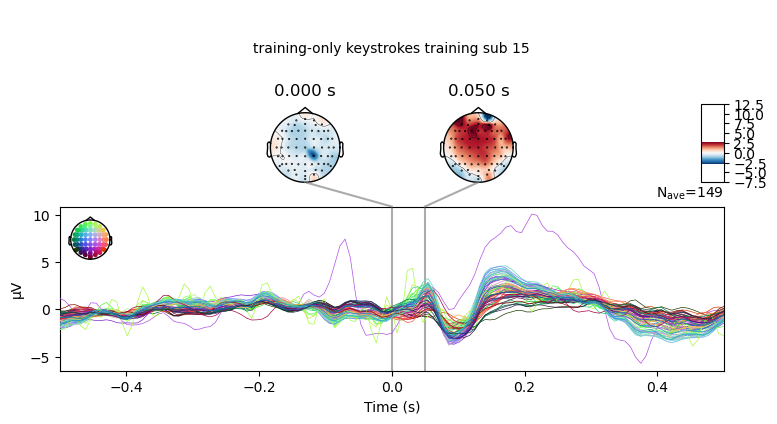

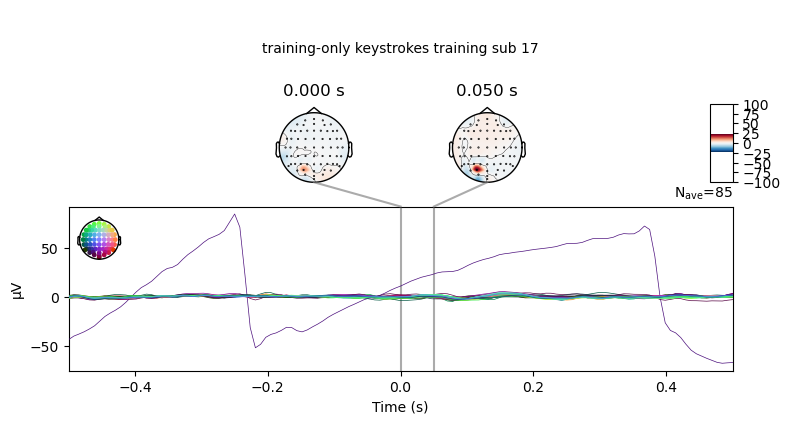

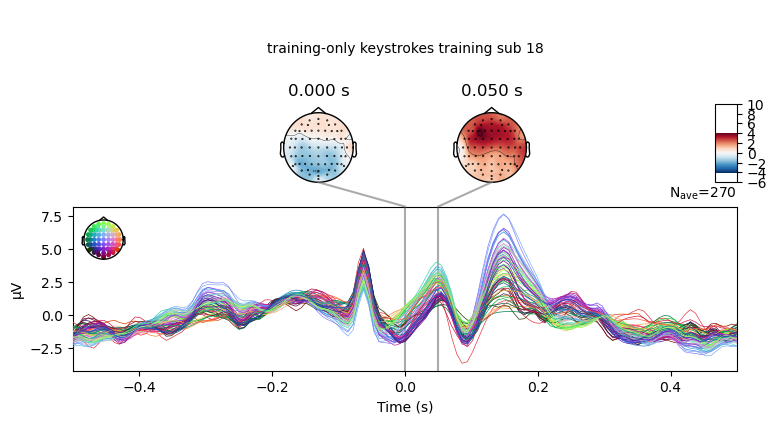

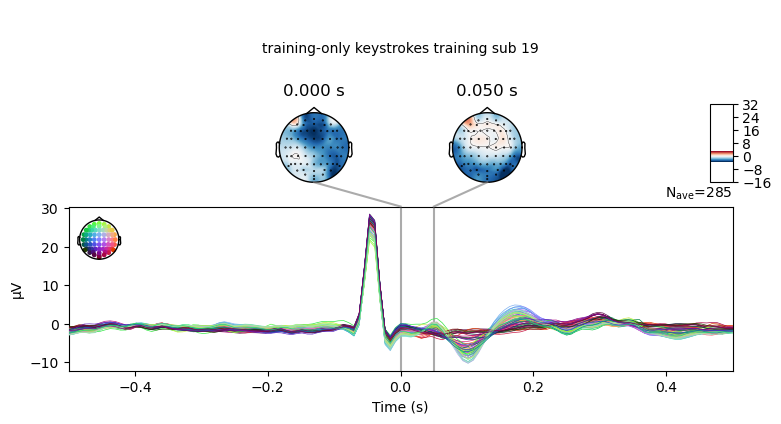

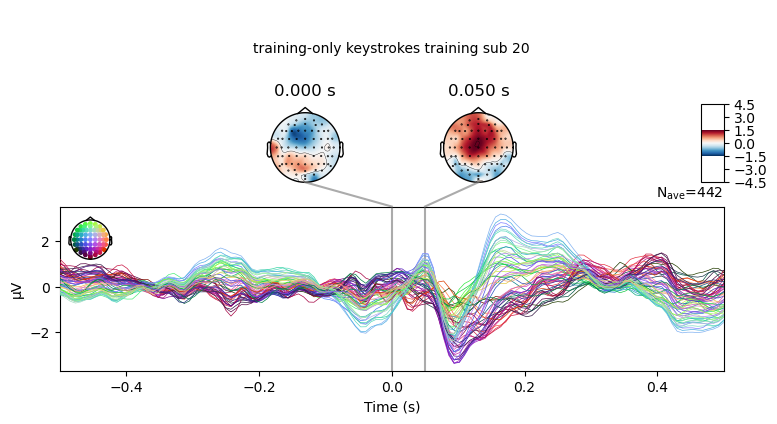

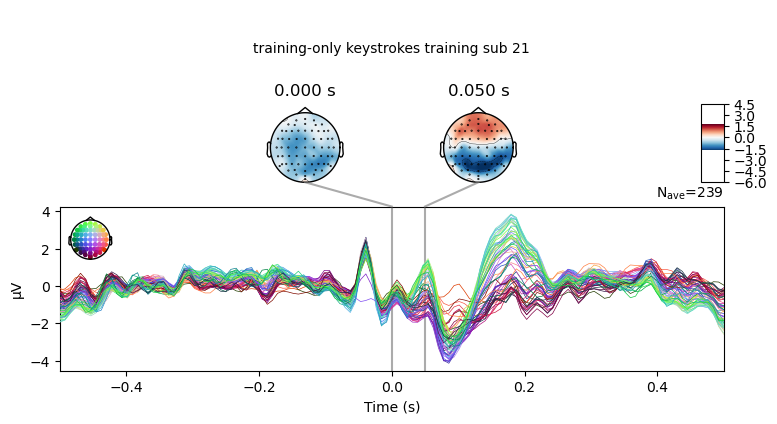

In [96]:
for subject in subjects_to_process:

    if task == 'listen' or task == 'motor':
        evokeds_pre = mne.read_evokeds(glob.glob(os.path.join(evoked_dir, f'{task}_ERP_pre_{subject}.fif'))[0])[0]
        evokeds_pre.plot_joint(times =[ 0, 0.05], title= f'{task}-only keystrokes pre-training sub {subject}', picks = 'all')

        evokeds_post = mne.read_evokeds(glob.glob(os.path.join(evoked_dir, f'{task}_ERP_post_{subject}.fif'))[0])[0]
        evokeds_post.plot_joint(times =[ 0, 0.05], title= f'{task}-only keystrokes post-training sub {subject}', picks = 'all')   

    elif task == 'training':
        evokeds = mne.read_evokeds(glob.glob(os.path.join(evoked_dir, f'{task}_ERP_{subject}.fif'))[0])[0]
        evokeds.plot_joint(times =[ 0, 0.05], title= f'{task}-only keystrokes training sub {subject}', picks = 'all')

